## Final Project Submission

Please fill out:
* Student name: Jenyl Murdock
* Student pace: part time 
* Scheduled project review date/time: 
* Instructor name: Joe San Pietro
* Blog post URL:


In [ ]:
# Your code here - remember to use markdown cells for comments as well!

In [1]:
# access the data file and get a visual of the information

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Check for multicollinearity
import seaborn as sns

# look at results for each linear regression model using statsmodels
import statsmodels.formula.api as smf

kc = pd.read_csv('kc_house_data.csv')
print ('shape of the data -', kc.shape)
kc.head(10)

shape of the data - (21597, 21)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,...,11,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,...,7,1715,?,1995,0.0,98003,47.3097,-122.327,2238,6819
7,2008000270,1/15/2015,291850.0,3,1.50,1060,9711,1.0,0.0,NaN,...,7,1060,0.0,1963,0.0,98198,47.4095,-122.315,1650,9711
8,2414600126,4/15/2015,229500.0,3,1.00,1780,7470,1.0,0.0,0.0,...,7,1050,730.0,1960,0.0,98146,47.5123,-122.337,1780,8113
9,3793500160,3/12/2015,323000.0,3,2.50,1890,6560,2.0,0.0,0.0,...,7,1890,0.0,2003,0.0,98038,47.3684,-122.031,2390,7570


Insert description of column names, grade, & condition here

For bathrooms:
Values are decimal and calculated as:
Full bathrooms (ensuite) = 1
Half bathrooms (separate )= 0.5
Powder rooms (only toilet and sink) = 0.25
(Dahlin, 2016)

II.  Scrub the data

In [2]:
# The id column is not needed so it can be dropped from the data
kc = kc.drop(['id'], axis=1)
kc.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


B.  Remove null values

In [ ]:
# Check for null values in the dataset 
kc.isna().sum()

View has 63 null values.  Because this is not a significant number, these can be dropped from our data

In [ ]:
print (kc.view.unique())
print (kc.view.value_counts())

In [3]:
# select only the data for where the view is not a nan value
# convert view to data type string so the 'nan' data can be dropped
kc['view'] = kc.view.astype(str)
kc = kc[kc.view != 'nan'] 

# replace null values with 0 in waterfront column and change to data type integer
kc.waterfront = kc.waterfront.fillna(value=0)

# replace null values in yr_renovated with 0 and change to data type integer
kc.yr_renovated = kc.yr_renovated.fillna(value=0)


In [ ]:
# Verify that there are not any more null values
kc.isna().sum()

C.  reformat some columns and remove outliers

In [4]:
# check to see how each column is categorized
kc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21534 entries, 0 to 21596
Data columns (total 20 columns):
date             21534 non-null object
price            21534 non-null float64
bedrooms         21534 non-null int64
bathrooms        21534 non-null float64
sqft_living      21534 non-null int64
sqft_lot         21534 non-null int64
floors           21534 non-null float64
waterfront       21534 non-null float64
view             21534 non-null object
condition        21534 non-null int64
grade            21534 non-null int64
sqft_above       21534 non-null int64
sqft_basement    21534 non-null object
yr_built         21534 non-null int64
yr_renovated     21534 non-null float64
zipcode          21534 non-null int64
lat              21534 non-null float64
long             21534 non-null float64
sqft_living15    21534 non-null int64
sqft_lot15       21534 non-null int64
dtypes: float64(7), int64(10), object(3)
memory usage: 3.5+ MB


In [ ]:
kc.floors.value_counts()

In [ ]:
kc.bathrooms.value_counts()

In [5]:
# Start with an initial data type conversion
# For columns that are obviouly categorized wrong, convert them to an appropriate data type
kc['date'] = pd.to_datetime(kc.date)

# several features should be set as categorical
kc['view'] = kc.view.astype('category')
kc['waterfront'] = kc.waterfront.astype(int)
kc['waterfront'] = kc.waterfront.astype('category')
kc['yr_renovated'] = kc.yr_renovated.astype('category')

In [6]:
# Check columns for unusable data by looking at the unique values for each variable
# change to correct data type as needed

kc.floors.unique()
kc.floors.astype('category')

kc.bathrooms.value_counts
kc = kc[kc['bathrooms'] < 6]
kc.bathrooms.astype('category')

kc.condition.unique()
kc.condition.astype('category')

kc.grade.unique()
kc.grade.astype('category')

kc.sqft_living.unique() 
kc.sqft_lot.unique()
kc.sqft_above.unique()

# Bedrooms has one extreme outlier.  Let's look at the unique values.
kc.bedrooms.unique()
print ('bedroom value counts:', kc.bedrooms.value_counts())
kc = kc[kc['bedrooms'] < 7]
kc.bedrooms.astype('category')
                   
kc.sqft_basement.unique()

(kc.sqft_basement =='?').sum()  # there are 450 '?' in this column
(kc.sqft_basement == '0.0').sum()  # there are 12798 '0.0' values in this column

# Replace the '?' values with 0 in the sqft_basement data
kc['sqft_basement'] = (kc['sqft_basement'].replace('?', 0)).astype(float)
kc['sqft_basement'] = kc['sqft_basement'].astype(int)

# Instead of square feet values for the basement, let's just use a categorical value of 1 for if it has a basement
# and 0 for if it does not have a basement.
# https://github.com/matthewsparr/King-County-Sales-Analysis/blob/master/student2.ipynb
kc['basement'] = kc['sqft_basement'].apply(lambda row: 0 if row == 0 else 1)
kc.basement = kc.basement.astype('category')


print ('\nview value counts:', kc['view'].value_counts())

# A significant majority of the values for the variable view are 0, let's just use a categorical value of 1 for 
# if it has a view and 0 for if it does not have a view.
# https://github.com/matthewsparr/King-County-Sales-Analysis/blob/master/student2.ipynb

kc['has_view'] = kc['view'].apply(lambda row: 1 if row != 0 else 0)
print ('\nhas_view values:', kc['has_view'].unique())
kc.has_view = kc.has_view.astype('category')
                  
                   

bedroom value counts: 3     9791
4     6865
2     2754
5     1588
6      267
1      196
7       36
8       12
9        5
10       3
11       1
33       1
Name: bedrooms, dtype: int64

view value counts: 0.0    19366
2.0      952
3.0      505
1.0      327
4.0      311
Name: view, dtype: int64

has_view values: [1]


In [7]:
# Convert the year built to reflect the age of the house. This format will be easier to visualize
# https://github.com/matthewsparr/King-County-Sales-Analysis/blob/master/student2.ipynb
kc['yr_built'].describe()
kc['age'] = (kc.yr_built.max() - kc.yr_built + 1)
kc = kc.drop(['yr_built'], axis=1)
kc.head(2)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,basement,has_view,age
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0.0,3,...,0,0.0,98178,47.5112,-122.257,1340,5650,0,1,61
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0.0,3,...,400,1991.0,98125,47.7210,-122.319,1690,7639,1,1,65


In [ ]:
# Get the range of zip codes and calculate bin size based on water locations 
kc.zipcode.describe()

In [ ]:
kc.zipcode.unique()

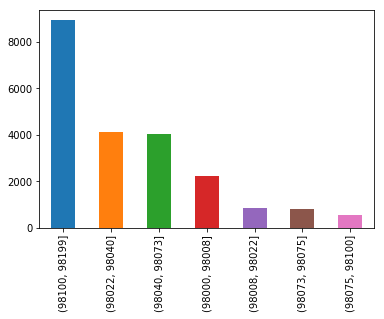

In [8]:
# create bins for zipcode
bins = [98000, 98008, 98022, 98040, 98073, 98075 , 98100 ,98199]
bins_zip = pd.cut(kc['zipcode'], bins)
bins_zip.value_counts().plot(kind='bar')

In [9]:
# replace the existing zipcode column
kc['zipcode'] = bins_zip
kc['zipcode'] = kc['zipcode'].cat.codes

In [ ]:
# Check that all data is converted to appropriate data type
kc.info()

In [ ]:
# Set up the matplotlib figure and generate a heatmap of the data
f, ax = plt.subplots(figsize=(10, 8))

sns.heatmap(kc.corr(), center = 0, linewidths = .25);

It looks like sqft_living, grade has high collinearity with some other features


A correlation is consider high if its absolute value is around 0.7 - 0.8.
Let's use 0.75 as a guide to see how many high correlations there are.
This showed a high correlation between sqft_lot and sqft_lot15.  Let's go ahead and
drop the sqft_lot15 variable

In [ ]:
print (abs(kc.corr() > 0.75))

In [ ]:
# Get an initial visualization of the data
# Note:  extra white space on either side of the graph indicates outliers which need to be removed
kc.hist(figsize=(15,15));

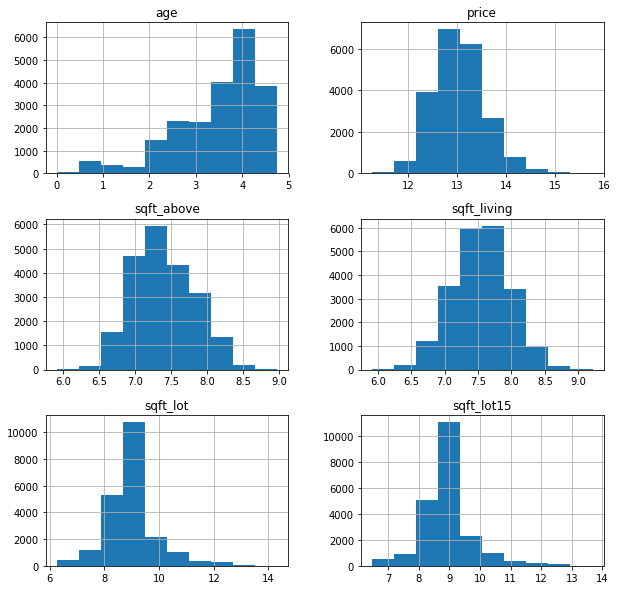

In [10]:
# Normalize the data of the continuous variables using log transformation

import numpy as np
kc_log = pd.DataFrame([])

kc_log['price'] = np.log(kc.price)
kc_log['age'] = np.log(kc.age)
kc_log['sqft_above'] = np.log(kc.sqft_above)
kc_log['sqft_living'] = np.log(kc.sqft_living)
kc_log['sqft_lot'] = np.log(kc.sqft_lot)
kc_log['sqft_lot15'] = np.log(kc.sqft_lot15)


# look at the histograms of the transformed data
kc_log.hist(figsize = (10,10));

Because bedrooms, condition, & floors could not be coerced into a normal distribution, they should be
considered for elimination.  Also latitude & longitude should be considered.

In [11]:
# Convert categorical columns to numeric format with one-hot encoding


bed_dummies = pd.get_dummies(kc.bedrooms, prefix = 'bedrooms')
#bath_dummies = pd.get_dummies(kc.bathrooms, prefix = 'bathrooms')
#floors_dummies = pd.get_dummies(kc.floors, prefix = 'floors')
cond_dummies = pd.get_dummies(kc.condition, prefix = 'condition')
grade_dummies = pd.get_dummies(kc.grade, prefix = 'grade')
has_view_dummies = pd.get_dummies(kc.has_view, prefix = 'view')
water_dummies = pd.get_dummies(kc.waterfront, prefix = 'waterfront')
basement_dummies = pd.get_dummies(kc.basement, prefix = 'basement')
zip_dummies = pd.get_dummies(bins_zip, prefix = 'zip')


# combine the log transformed data with the categorical dummy variables
kc_final = pd.concat([kc_log, kc.bathrooms,kc.floors, bed_dummies, cond_dummies, grade_dummies], axis=1)
kc_final = pd.concat([kc_final, has_view_dummies, water_dummies, basement_dummies, zip_dummies], axis=1 )


In [12]:
# set the max_columns attribute in order to view all of the column names with the categorical data
pd.set_option('display.max_columns', None)
kc_final.head()

,price,age,sqft_above,sqft_living,sqft_lot,sqft_lot15,bathrooms,floors,bedrooms_1,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,bedrooms_6,condition_1,condition_2,condition_3,condition_4,condition_5,grade_3,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12,grade_13,view_1,waterfront_0,waterfront_1,basement_0,basement_1,"zip_(98000, 98008]","zip_(98008, 98022]","zip_(98022, 98040]","zip_(98040, 98073]","zip_(98073, 98075]","zip_(98075, 98100]","zip_(98100, 98199]"
0,12.309982,4.110874,7.073270,7.073270,8.639411,8.639411,1.00,1.0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,1
1,13.195614,4.174387,7.682482,7.851661,8.887653,8.941022,2.25,2.0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,1
2,12.100712,4.418841,6.646391,6.646391,9.210340,8.994917,1.00,1.0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,1,0,0,0,1,0,0,0,0
3,13.311329,3.931826,6.956545,7.580700,8.517193,8.517193,3.00,1.0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,1
4,13.142166,3.367296,7.426549,7.426549,8.997147,8.923058,2.00,1.0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0


In [13]:
# run an OLS regression on the log transformed continuous variables

col_names = kc_final.columns[1:8]
results = [['ind_var', 'r_squared', 'intercept', 'slope', 'p_value']]

for idx, val in enumerate(col_names):
    print ('Kings County:  Price ~ ' + val)
    print ('-------------------------------------')
    
    f = 'price~' + val
    model = smf.ols(formula = f, data = kc_final).fit()
    X_new = pd.DataFrame({val: [kc_final[val].min(), kc_final[val].max()]});
    predic = model.predict(X_new)
    results.append([val, model.rsquared, model.params[0], model.params[1], model.pvalues[1]])
    print (results[idx+1])

Kings County:  Price ~ age
-------------------------------------
['age', 0.01997945197442741, 13.321980446627375, -0.07922686826563163, 3.489253781083607e-96]
Kings County:  Price ~ sqft_above
-------------------------------------
['sqft_above', 0.3393229836531665, 7.744538844531891, 0.7170370881924184, 0.0]
Kings County:  Price ~ sqft_living
-------------------------------------
['sqft_living', 0.45110252250039684, 6.753046881544533, 0.8336757752775648, 0.0]
Kings County:  Price ~ sqft_lot
-------------------------------------
['sqft_lot', 0.01835294091421613, 12.338667712384398, 0.07864813332304832, 1.942415727701488e-88]
Kings County:  Price ~ sqft_lot15
-------------------------------------
['sqft_lot15', 0.014766230712011996, 12.343527807578894, 0.07835497457624574, 2.1377520524499024e-71]
Kings County:  Price ~ bathrooms
-------------------------------------
['bathrooms', 0.2983874400347397, 12.246965646550995, 0.3786751188275026, 0.0]
Kings County:  Price ~ floors
--------------

In [14]:
# Convert the results table to a dataframe
print ()
print ('1st iteration - OLS with log transformed continuous variables')
pd.DataFrame(results)



1st iteration - OLS with log transformed continuous variables


,0,1,2,3,4
0,ind_var,r_squared,intercept,slope,p_value
1,age,0.0199795,13.322,-0.0792269,3.48925e-96
2,sqft_above,0.339323,7.74454,0.717037,0
3,sqft_living,0.451103,6.75305,0.833676,0
4,sqft_lot,0.0183529,12.3387,0.0786481,1.94242e-88
5,sqft_lot15,0.0147662,12.3435,0.078355,2.13775e-71
6,bathrooms,0.298387,12.247,0.378675,0
7,floors,0.0952713,12.5984,0.299497,0


In [15]:
print()
print (model.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.095
Model:                            OLS   Adj. R-squared:                  0.095
Method:                 Least Squares   F-statistic:                     2260.
Date:                Mon, 22 Apr 2019   Prob (F-statistic):               0.00
Time:                        23:04:53   Log-Likelihood:                -15490.
No. Observations:               21461   AIC:                         3.098e+04
Df Residuals:                   21459   BIC:                         3.100e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.5984      0.010   1259.483      0.

The p-value does not give us any significant value that shows a variable should be removed.
The three highest r-squared values are for grade, sqft_above, and sqft_living 

Remove obvious variables such as:
    p-value > .05 &
    r squared value that are very close to 0

In [16]:
# drop the columns with lowest r-squared values and also drop sqft_living since it is highly correlated
# with other features based on the heatmap

drop_cols = ['sqft_lot', 'sqft_lot15', 'sqft_living']
kc_final = kc_final.drop(drop_cols, axis=1)


After removing the first round of variables, run the OLS again on the remaining variables.
Since a few columns have been deleted, the column indices need to be adjusted

In [ ]:
# check the column indices as some have been removed
kc_final.head(2)

In [17]:
col_names = kc_final.columns[1:5]

results = [['ind_var', 'r_squared', 'intercept', 'slope', 'p_value']]

for idx, val in enumerate(col_names):
    print()
    print ('Kings County:  Price ~ ' + val)
    print ('-------------------------------------')
    
    f = 'price~' + val
    model = smf.ols(formula = f, data = kc_final).fit()
    X_new = pd.DataFrame({val: [kc_final[val].min(), kc_final[val].max()]});
    predic = model.predict(X_new)
    results.append([val, model.rsquared, model.params[0], model.params[1], model.pvalues[1]])
    print (results[idx+1])


Kings County:  Price ~ age
-------------------------------------
['age', 0.01997945197442741, 13.321980446627375, -0.07922686826563163, 3.489253781083607e-96]

Kings County:  Price ~ sqft_above
-------------------------------------
['sqft_above', 0.3393229836531665, 7.744538844531891, 0.7170370881924184, 0.0]

Kings County:  Price ~ bathrooms
-------------------------------------
['bathrooms', 0.2983874400347397, 12.246965646550995, 0.3786751188275026, 0.0]

Kings County:  Price ~ floors
-------------------------------------
['floors', 0.09527127896378318, 12.598396795809439, 0.2994974278829736, 0.0]


In [18]:
# Convert the continuous variables results table to a dataframe
print ()
print ('2nd Iteration - OLS with log transformed continuous variables')
pd.DataFrame(results)


2nd Iteration - OLS with log transformed continuous variables


,0,1,2,3,4
0,ind_var,r_squared,intercept,slope,p_value
1,age,0.0199795,13.322,-0.0792269,3.48925e-96
2,sqft_above,0.339323,7.74454,0.717037,0
3,bathrooms,0.298387,12.247,0.378675,0
4,floors,0.0952713,12.5984,0.299497,0


In [19]:
print()
print (model.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.095
Model:                            OLS   Adj. R-squared:                  0.095
Method:                 Least Squares   F-statistic:                     2260.
Date:                Mon, 22 Apr 2019   Prob (F-statistic):               0.00
Time:                        23:05:47   Log-Likelihood:                -15490.
No. Observations:               21461   AIC:                         3.098e+04
Df Residuals:                   21459   BIC:                         3.100e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.5984      0.010   1259.483      0.

In [20]:
# drop columns
drop_cols =['age', 'floors']

kc_final = kc_final.drop(drop_cols, axis=1)


In [21]:
kc_final.head(2)

,price,sqft_above,bathrooms,bedrooms_1,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,bedrooms_6,condition_1,condition_2,condition_3,condition_4,condition_5,grade_3,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12,grade_13,view_1,waterfront_0,waterfront_1,basement_0,basement_1,"zip_(98000, 98008]","zip_(98008, 98022]","zip_(98022, 98040]","zip_(98040, 98073]","zip_(98073, 98075]","zip_(98075, 98100]","zip_(98100, 98199]"
0,12.309982,7.073270,1.00,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,1
1,13.195614,7.682482,2.25,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,1


In [22]:
# now run another OLS regression with the categorical variables
col_names = kc_final.columns[3:] 

results = [['ind_var', 'r_squared', 'intercept', 'slope', 'p_value']]

for idx, val in enumerate(col_names):
    print ('Kings County:  Price ~ ' + val)
    print ('-------------------------------------')
    
    f = 'price~' + val
    model = smf.ols(formula = f, data = kc_final).fit()
    X_new = pd.DataFrame({val: [kc_final[val].min(), kc_final[val].max()]});
    predic = model.predict(X_new)
    results.append([val, model.rsquared, model.params[0], model.params[1], model.pvalues[1]])
    print (results[idx+1])

Kings County:  Price ~ bedrooms_1
-------------------------------------
['bedrooms_1', 0.007676823034775571, 13.049995627372033, -0.48223059371888677, 7.599300726158697e-38]
Kings County:  Price ~ bedrooms_2
-------------------------------------
['bedrooms_2', 0.032516510767172546, 13.08181634287509, -0.2822881524255826, 2.767445768648878e-156]
Kings County:  Price ~ bedrooms_3
-------------------------------------
['bedrooms_3', 0.03621116879463149, 13.136850160433454, -0.20003087839857786, 3.8891282898021495e-174]
Kings County:  Price ~ bedrooms_4
-------------------------------------
['bedrooms_4', 0.053568461596667394, 12.962485428503525, 0.2598017744424824, 6.613539316484243e-259]
Kings County:  Price ~ bedrooms_5
-------------------------------------
['bedrooms_5', 0.03304198029003236, 13.018688451120184, 0.363580675800963, 8.073510602471855e-159]
Kings County:  Price ~ bedrooms_6
-------------------------------------
['bedrooms_6', 0.005065169603328701, 13.04140913443771, 0.3361

SyntaxError: invalid syntax (<unknown>, line 1)

In [ ]:
 # convert the categorical variables results table to a dataframe
print ()
print ('1st iteration - OLS with categorical variables')
pd.DataFrame(results)

In [ ]:
print (model.summary())

In [ ]:
# Evaluate whether any categorical variables should be eliminated

In [ ]:
# not sure about which ones. 
drop_cols = ['basement_0', 'basement_1']
kc_final = kc_final.drop(drop_cols, axis=1)

In [ ]:
# use statsmodels to run ols on all the data  *** Mod 1 sec 11- multiple linear regression in statsmodels

import statsmodels.api as sm

predictors = kc_final.columns[1:]
predictors_int = sm.add_constant(predictors)
model = sm.ols(kc_final['price'], predictors_int).fit()
model.summary()

In [ ]:
-----------------------------------

In [ ]:
# now run a second OLS regression with the remaining categorical variables and the dependent variable
col_names = kc_log.columns[8:]  
results = [['ind_var', 'r_squared', 'intercept', 'slope', 'p_value']]

for idx, val in enumerate(col_names):
    print ('Kings County:  Price ~ ' + val)
    print ('-------------------------------------')
    
    f = 'price~' + val
    model = smf.ols(formula = f, data = kc_log).fit()
    X_new = pd.DataFrame({val: [kc_log[val].min(), kc_log[val].max()]});
    predic = model.predict(X_new)
    results.append([val, model.rsquared, model.params[0], model.params[1], model.pvalues[1]])
    print (results[idx+1])

In [ ]:
 # convert the remaining categorical variable results table to a dataframe
print ()
print ('2nd iteration - OLS with categorical variables')
pd.DataFrame(results)

In [ ]:
print (model.summary())

In [ ]:
# dropped these to see what would happen to my results -> r-squared actually went down from 58+% to 56+%
drop_cols = ['bedrooms', 'floors', 'view_0', 'view_1']
kc_log = kc_log.drop(drop_cols, axis=1)

In [ ]:
# run an ols on all of the remaining variables
col_names = kc_log.columns[1:]  
results = [['ind_var', 'r_squared', 'intercept', 'slope', 'p_value']]

for idx, val in enumerate(col_names):
    print ('Kings County:  Price ~ ' + val)
    print ('-------------------------------------')
    
    f = 'price~' + val
    model = smf.ols(formula = f, data = kc_log).fit()
    X_new = pd.DataFrame({val: [kc_log[val].min(), kc_log[val].max()]});
    predic = model.predict(X_new)
    results.append([val, model.rsquared, model.params[0], model.params[1], model.pvalues[1]])
    print (results[idx+1])

In [ ]:
 # convert the remaining variables results table to a dataframe
print ()
print ('OLS with remaining variables')
pd.DataFrame(results)

In [ ]:
print (model.summary())

Model Validation - using a train-test-split

In [ ]:
X = kc_final.drop(['price'], axis=1)
y = kc_final['price']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2)

from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)

yhat_train = linreg.predict(X_train)
yhat_test = linreg.predict(X_test)

# look at the residuals
train_residuals = yhat_train - y_train
test_residuals = yhat_test - y_test

print ('Training Data Residuals: ', train_residuals)
print ()
print ()
print ('Test Data Residuals: ', test_residuals)




In [ ]:
print (linreg.score(X,y))

In [ ]:
# mean squarred error
mse_train = np.sum((y_train - yhat_train)**2) / len(y_train)
mse_test= np.sum((y_test - yhat_test)**2) / len(y_test)

print ('Train Mean Squarred Error: ', mse_train)
print ('Test Mean Squarred Error: ', mse_test)